# 과적합의 이해

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from help_a.regression import *
from help_a.util import *
from help_a.plot import *
from help_a.analysis import *

### [2] 데이터 가져오기

농어 무게 예측 데이터

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx", info=False)

## Case 1. 농어의 길이를 통한 무게 예측 모형

> `my_linear_regrassion()` 함수 안에서 학습곡선을 출력할 수 있도록 helper 내용을 수정하였다.

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.895697 |
+----+-------------------+

[회귀식]
무게 = 37.792 * 길이 + -680.603

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.934881 |     0.872622 |
| 평균절대오차(MAE)             |      71.0729 |      74.3083 |
| 평균제곱오차(MSE)             |      7921.84 |      13926.4 |
| 평균오차(RMSE)                |      89.0047 |       118.01 |
| 평균 절대 백분오차 비율(MAPE) |       55.009 |      390.162 |
| 평균 비율 오차(MPE)           |      25.5671 |      366.451 |
+-------------------------------+--------------+--------------+

[학습곡선]


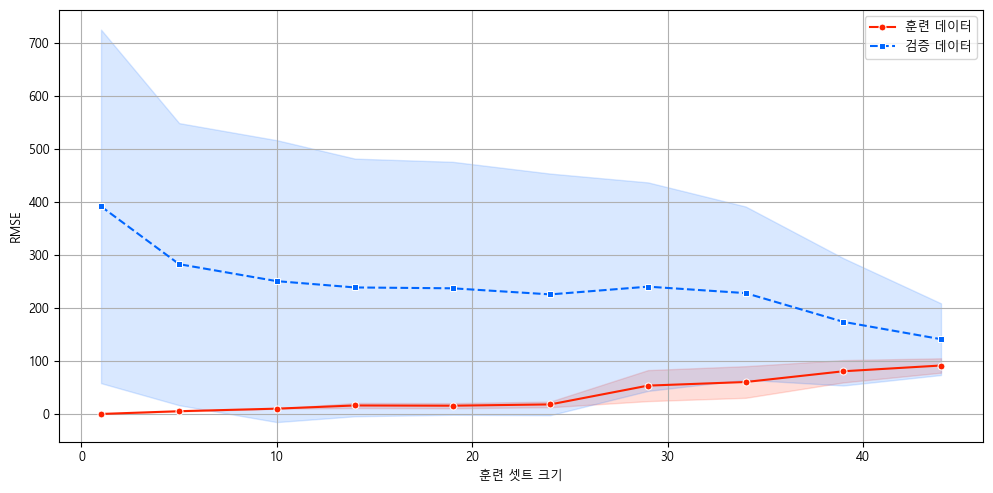


[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------+-------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확률 |   VIF |
|----+------------+------------+--------------------+------------+------------------+--------+------------+-------|
|  0 | 무게       | 길이       |            37.7924 |      3.477 |             0.94 | 10.869 |          0 |     0 |
+----+------------+------------+--------------------+------------+------------------+--------+------------+-------+

𝑅^2(0.873), Adj.𝑅^2(0.864), F(102.759), P-value(4.176e-08), Durbin-Watson(2.174)

무게에 대하여 길이로 예측하는 회귀분석을 실시한 결과,
이 회귀모형은 통계적으로 유의하다(F(1,15) = 102.759, p <= 0.05).

길이의 회귀계수는 37.792(p <= 0.05)로, 무게에 대하여 유의미한 예측변인인 것으로 나타났다.


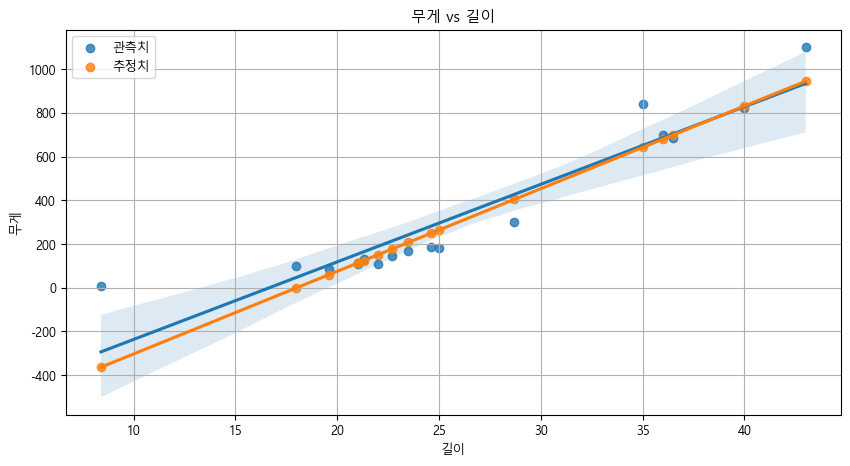

In [3]:
df = origin[['길이', '무게']]
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='무게', test_size=0.3, scalling=False)
fit = my_linear_regression(x_train, y_train, x_test, y_test, cv=5, learning_curve=True, dpi=100)

> 너무 일찍 일반화가 이루어지고 에러율이 높게 나타나는것으로 보아 과소적합이라 볼 수 있다.
> 
> 길이만으로 무게를 예측할 경우 과소적합이 발생하기 때문에 변수를 늘려야 한다.

## Case 2. 길이,두께,높이를 통한 무게 예측 모형

과소적합을 해결하기 위해 특성을 늘려서 다중 선형 회귀 모형을 구축한다.

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.882093 |
+----+-------------------+

[회귀식]
무게 = -15.965 * 길이 + 181.015 * 높이 + 168.250 * 두께 + 365.736

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.938086 |     0.948505 |
| 평균절대오차(MAE)             |       64.426 |      63.8697 |
| 평균제곱오차(MSE)             |      7280.98 |       6075.9 |
| 평균오차(RMSE)                |      85.3286 |       77.948 |
| 평균 절대 백분오차 비율(MAPE) |      138.815 |      22.6303 |
| 평균 비율 오차(MPE)           |      109.492 |     -18.1963 |
+-------------------------------+--------------+--------------+

[학습곡선]


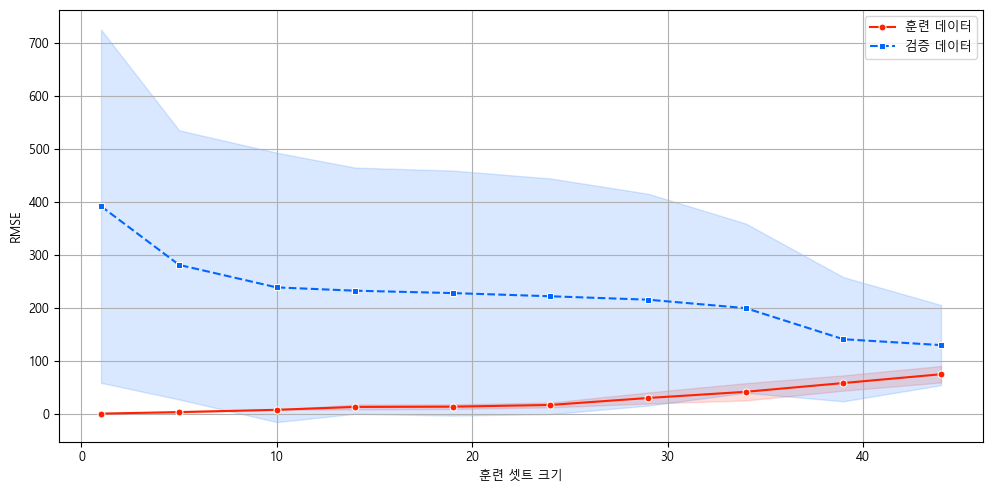


[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확률 |     VIF |
|----+------------+------------+--------------------+------------+------------------+--------+------------+---------|
|  0 | 무게       | 길이       |           -15.9652 |    162.464 |            0.252 | -0.098 |      0.924 | 25.2841 |
|  1 | 무게       | 높이       |            181.015 |    254.543 |            0.732 |  0.711 |      0.497 | 63.9335 |
|  2 | 무게       | 두께       |             168.25 |    150.565 |            0.013 |  1.117 |      0.296 | 25.8528 |
+----+------------+------------+--------------------+------------+------------------+--------+------------+---------+

𝑅^2(0.949), Adj.𝑅^2(0.929), F(49.119), P-value(1.694e-05), Durbin-Watson(2.199)

무게에 대하여 길이,높이,두께로 예측하는 회귀분석을 실시한 결과,
이 회귀모형은 통계적으로 유의하다(F(3,8) = 49.119, p <= 0.05).

길이의 회귀계수는 -15.965(p > 0.05)로, 

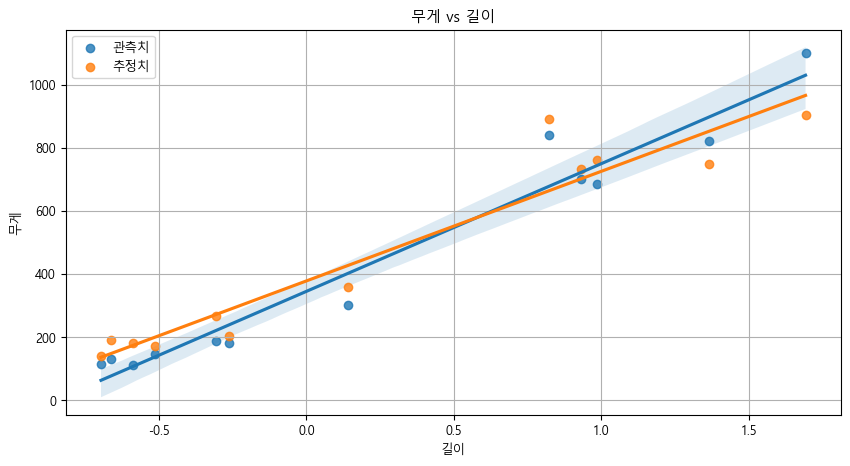

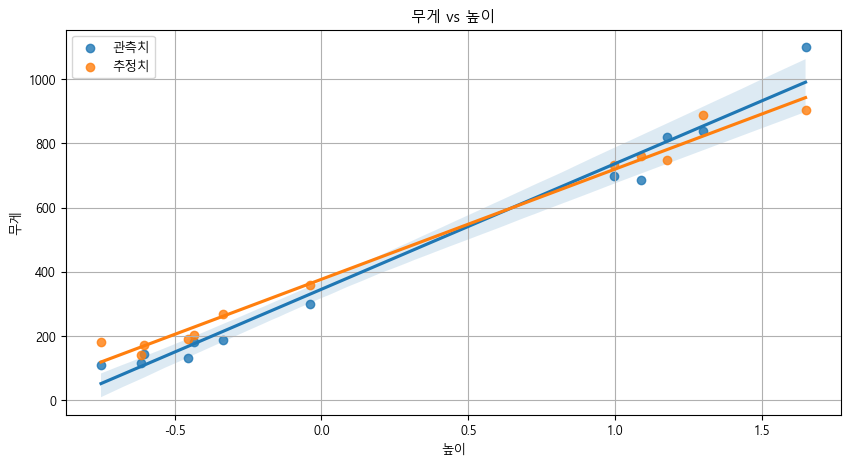

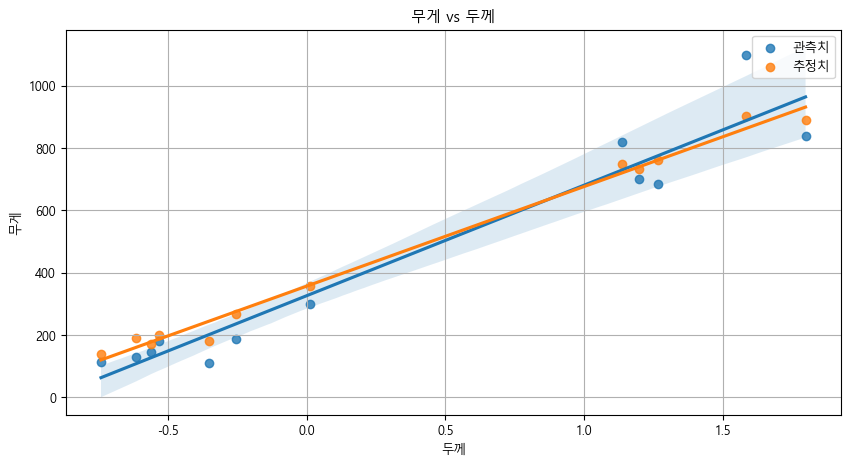

In [5]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='무게', test_size=0.2, scalling=True)
fit = my_linear_regression(x_train, y_train, x_test, y_test, cv=5, learning_curve=True, dpi=100)

> 어느정도 과소적합이 해결되었지만 여전히 과소적합 상태라 볼 수 있다.

## Case 3. 다항 회귀 모형

과소적합 해결을 위해 특성을 늘릴 필요가 있을 경우 가장 손쉬운 방법은 특성의 차수를 늘리는 것이다.

### [1] 2차항으로 특성 변형

#### (1) 2차항을 갖는 데이터 프레임 생성

원본 데이터 프레임을 변형한 것이므로 스케일링이 되지 않은 상태임

In [6]:
poly_df = my_poly_features(origin, ignore=['무게'], degree=2)
my_pretty_table(poly_df.head())

+----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+--------+
|    |   길이 |   높이 |   두께 |   길이^2 |   길이 높이 |   길이 두께 |   높이^2 |   높이 두께 |   두께^2 |   무게 |
|----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    70.56 |      17.724 |      11.844 |   4.4521 |      2.9751 |   1.9881 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |   187.69 |      48.361 |        27.4 |  12.4609 |        7.06 |        4 |     32 |
|  2 |     15 |   3.82 |   2.43 |      225 |        57.3 |       36.45 |  14.5924 |      9.2826 |   5.9049 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   262.44 |      74.358 |      42.606 |  21.0681 |     12.0717 |   6.9169 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |   302.76 |      79.866 |      51.156 |  21.0681 |     13.4946 |   8.6436 |     70 |
+----+--------+--------+--------+----------+-------------+-------------+----------

#### (2) 회귀모형 생성

스케일링 적용하여 데이터를 분할하고 그 결과를 활용하여 회귀모형을 생성

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.950107 |
+----+-------------------+

[회귀식]
무게 = 261.750 * 길이 + -330.178 * 높이 + -108.663 * 두께 + -2891.949 * 길이^2 + 911.825 * 길이 높이 + 4974.280 * 길이 두께 + 2388.694 * 높이^2 + -4880.500 * 높이 두께 + 10.111 * 두께^2 + 365.736

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.990648 |      0.88922 |
| 평균절대오차(MAE)             |      23.8862 |      59.9979 |
| 평균제곱오차(MSE)             |      1099.76 |        13071 |
| 평균오차(RMSE)                |      33.1627 |      114.329 |
| 평균 절대 백분오차 비율(MAPE) |      13.0666 |      16.0658 |
| 평균 비율 오차(MPE)           |     -3.13218 |    -0.620989 |
+-------------------------------+--------------+--------------+

[학습곡선]


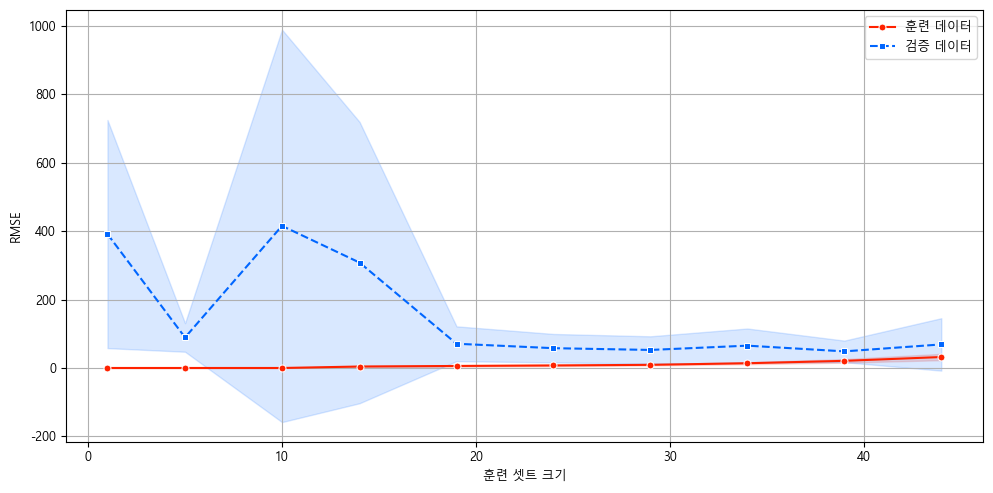


[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------+-------------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확률 |         VIF |
|----+------------+------------+--------------------+------------+------------------+--------+------------+-------------|
|  0 | 무게       | 길이       |             261.75 |    7404.34 |           -0.526 |  0.035 |      0.975 |     4666.23 |
|  1 | 무게       | 높이       |           -330.178 |    9771.63 |           -0.674 | -0.034 |      0.976 |     7788.42 |
|  2 | 무게       | 두께       |           -108.663 |     8807.5 |            0.316 | -0.012 |      0.991 |     7565.13 |
|  3 | 무게       | 길이^2     |           -2891.95 |    55578.1 |             3.69 | -0.052 |      0.963 |      188326 |
|  4 | 무게       | 길이 높이  |            911.824 |     150663 |           -2.076 |  0.006 |      0.996 | 1.35281e+06 |
|  5 | 무게       | 길이 두께  |            4974.28 |    50586.2

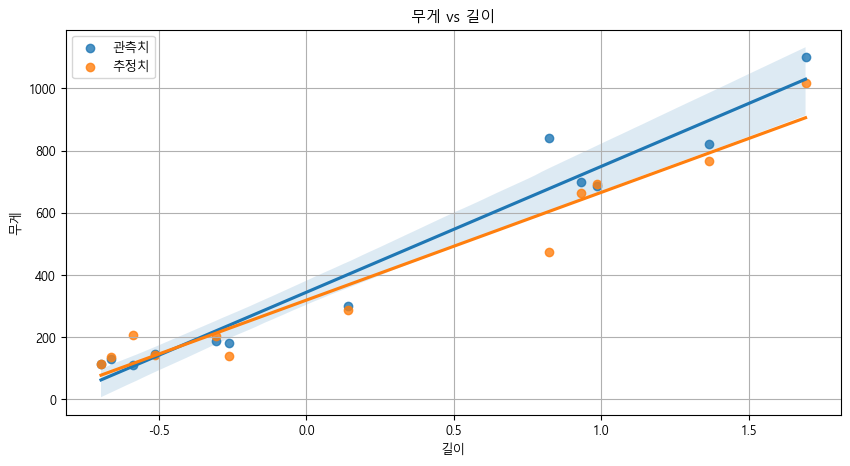

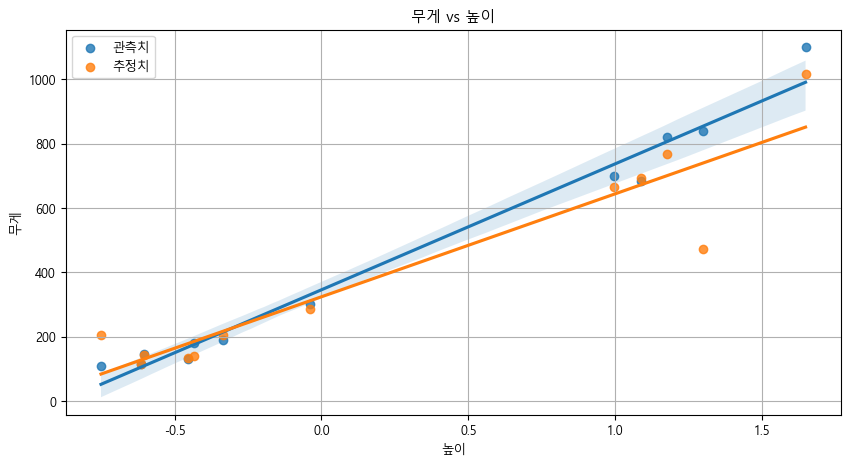

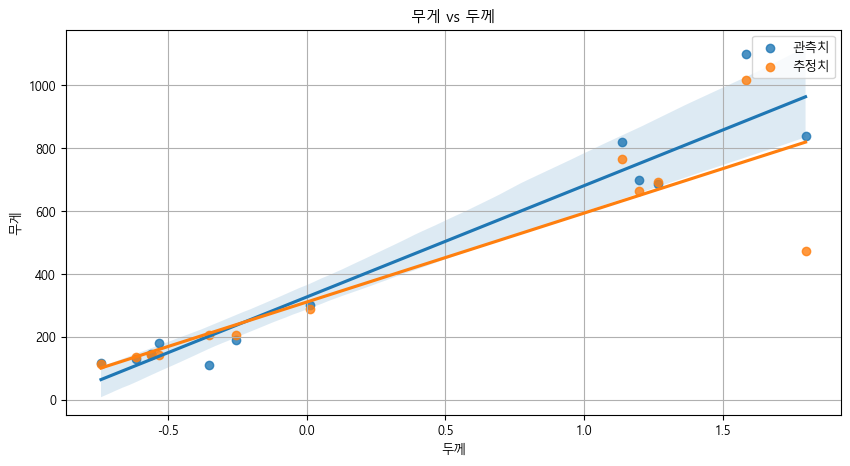

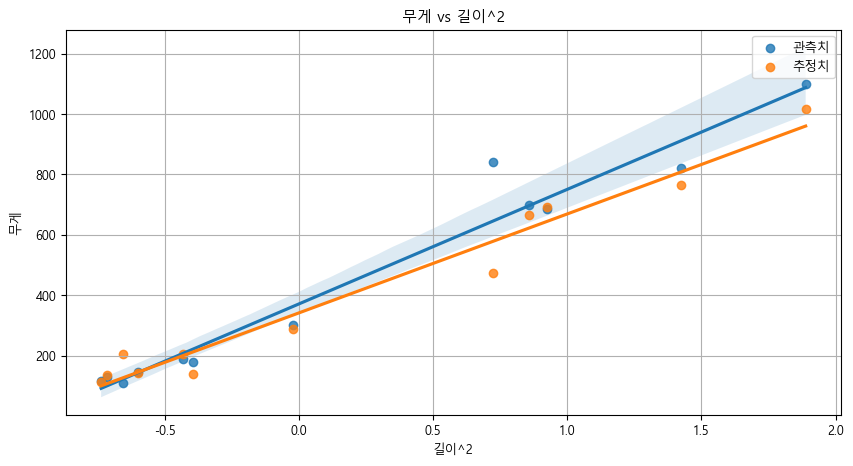

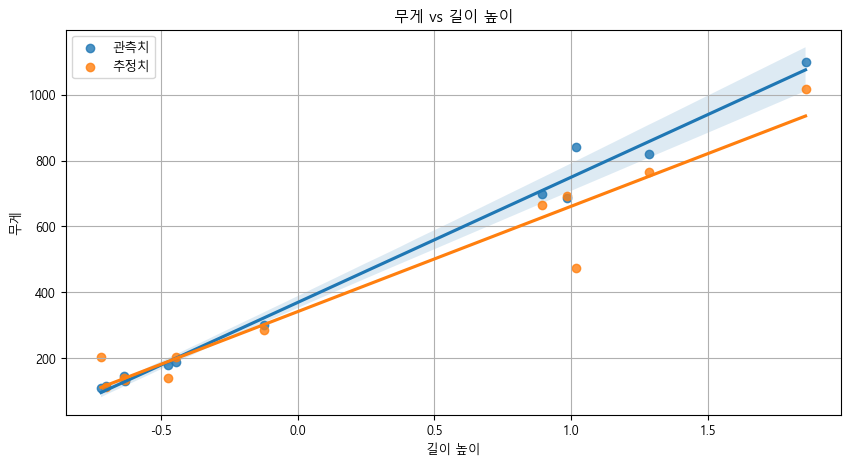

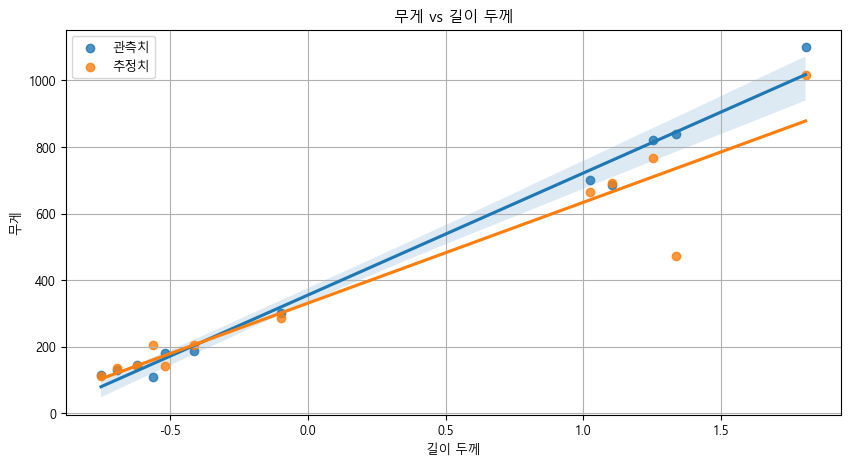

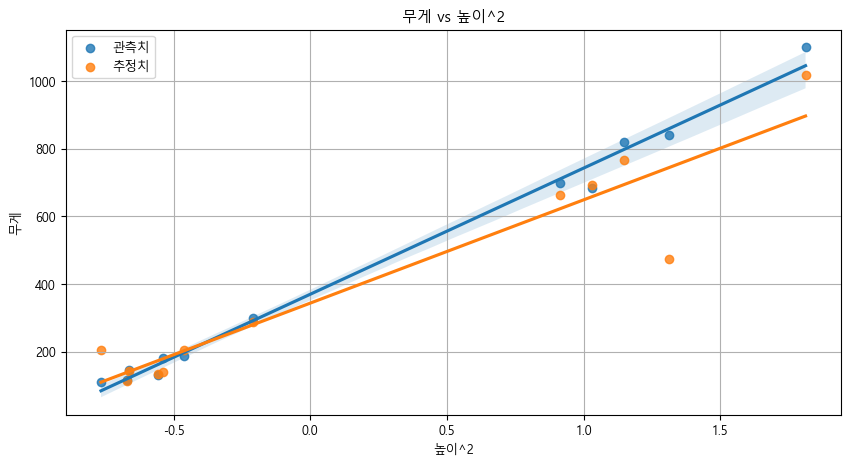

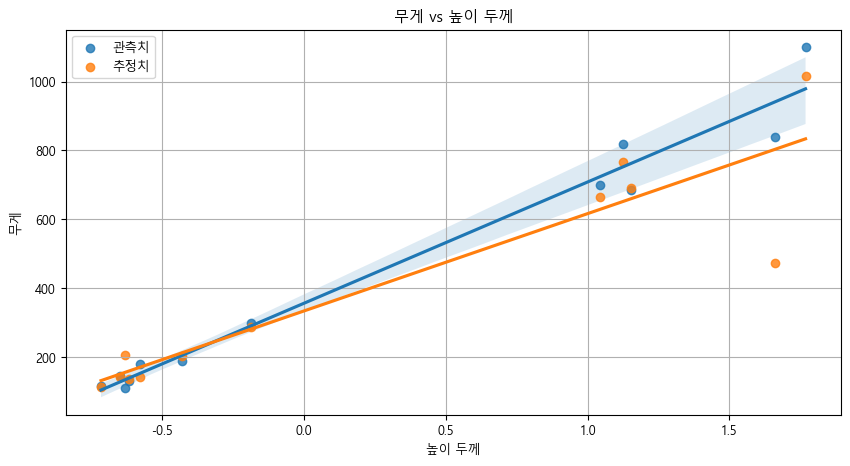

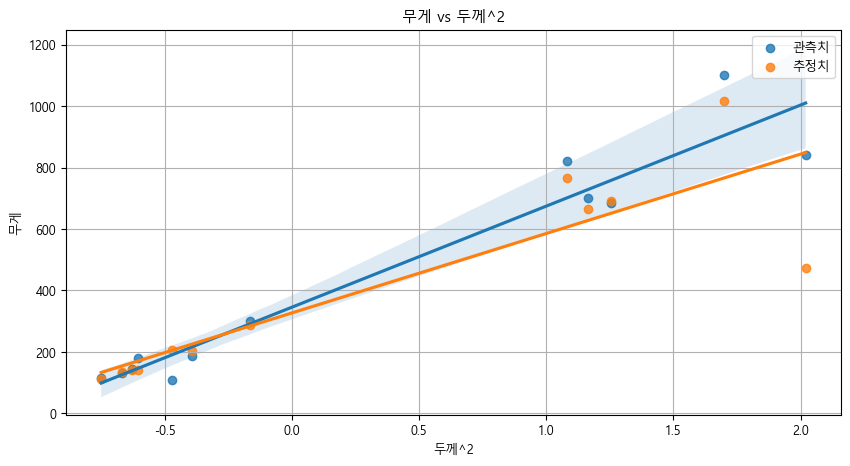

In [8]:
x_train, x_test, y_train, y_test = my_train_test_split(poly_df, yname='무게', test_size=0.2, scalling=True)
fit = my_linear_regression(x_train, y_train, x_test, y_test, cv=5, learning_curve=True, dpi=100)

> 과소적합 문제가 어느정도 해결되었다.

### [2] 3차항으로 특성 변형

#### (1) 3차항을 갖는 데이터프레임 생성

In [9]:
poly_df = my_poly_features(origin, ignore=['무게'], degree=3)
my_pretty_table(poly_df.head())

+----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+----------+---------------+---------------+---------------+------------------+---------------+----------+---------------+---------------+----------+--------+
|    |   길이 |   높이 |   두께 |   길이^2 |   길이 높이 |   길이 두께 |   높이^2 |   높이 두께 |   두께^2 |   길이^3 |   길이^2 높이 |   길이^2 두께 |   길이 높이^2 |   길이 높이 두께 |   길이 두께^2 |   높이^3 |   높이^2 두께 |   높이 두께^2 |   두께^3 |   무게 |
|----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+----------+---------------+---------------+---------------+------------------+---------------+----------+---------------+---------------+----------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    70.56 |      17.724 |      11.844 |   4.4521 |      2.9751 |   1.9881 |  592.704 |       148.882 |       99.4896 |       37.3976 |          24.9908 |          16.7 |  9.39393 |       6.27746 |       4.19489 |  2.80322 |    5.9 

#### (2) 회귀모형 생성

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.787923 |
+----+-------------------+

[회귀식]
무게 = 1178.837 * 길이 + -805.686 * 높이 + -515.027 * 두께 + -23220.699 * 길이^2 + 52634.177 * 길이 높이 + -7581.469 * 길이 두께 + -8602.054 * 높이^2 + -37660.953 * 높이 두께 + 24890.450 * 두께^2 + 77915.128 * 길이^3 + -322858.408 * 길이^2 높이 + 116512.326 * 길이^2 두께 + 162314.780 * 길이 높이^2 + 282155.107 * 길이 높이 두께 + -266266.480 * 길이 두께^2 + -19975.146 * 높이^3 + -101654.565 * 높이^2 두께 + -17652.803 * 높이 두께^2 + 89484.653 * 두께^3 + 365.736

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.996224 |     -2.53813 |
| 평균절대오차(MAE)             |      14.2503 |      213.247 |
| 평균제곱오차(MSE)             |      444.046 |       417467 |
| 평균오차(RMSE)                |      21.0724 |      646.117 |
| 평균 절대 백분오차 비율(M

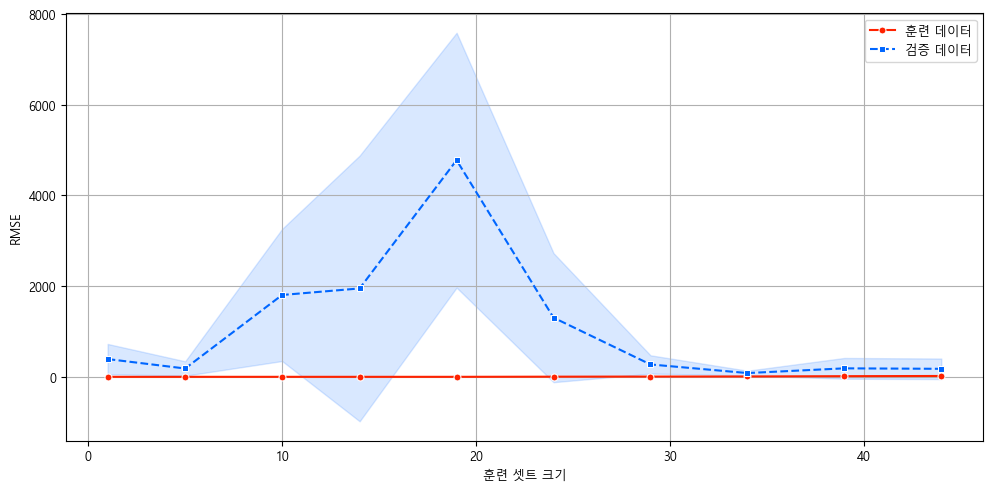


[선형회귀분석 결과보고]
+----+------------+----------------+--------------------+-------------+------------------+-----+------------+-------+
|    | 종속변수   | 독립변수       |   B(비표준화 계수) |    표준오차 |   β(표준화 계수) |   t |   유의확률 |   VIF |
|----+------------+----------------+--------------------+-------------+------------------+-----+------------+-------|
|  0 | 무게       | 길이           |            1178.84 | 8.53261e+09 |            2.603 |   0 |        nan |   inf |
|  1 | 무게       | 높이           |           -805.686 |         nan |            6.162 | nan |        nan |   inf |
|  2 | 무게       | 두께           |           -515.027 | 6.76069e+09 |            2.182 |  -0 |        nan |   inf |
|  3 | 무게       | 길이^2         |           -23220.7 | 1.49015e+10 |           -2.954 |  -0 |        nan |   inf |
|  4 | 무게       | 길이 높이      |            52634.2 |         nan |           -9.843 | nan |        nan |   inf |
|  5 | 무게       | 길이 두께      |           -7581.47 | 1.90534e+10 |           -2.677 |  -0 |

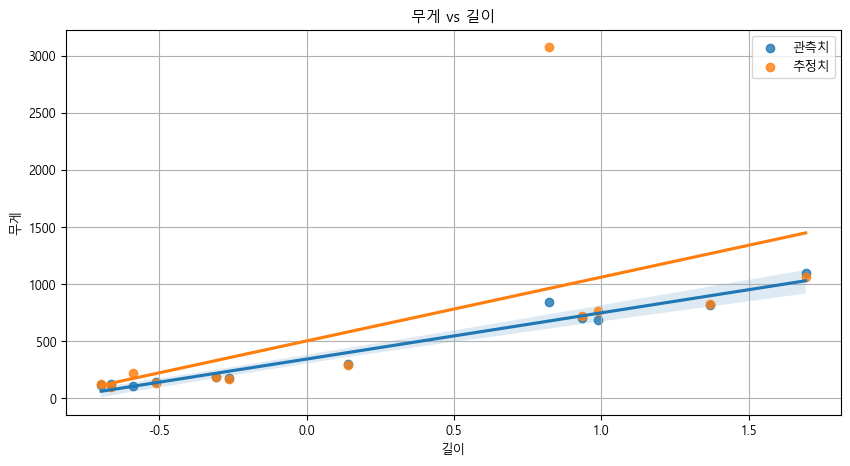

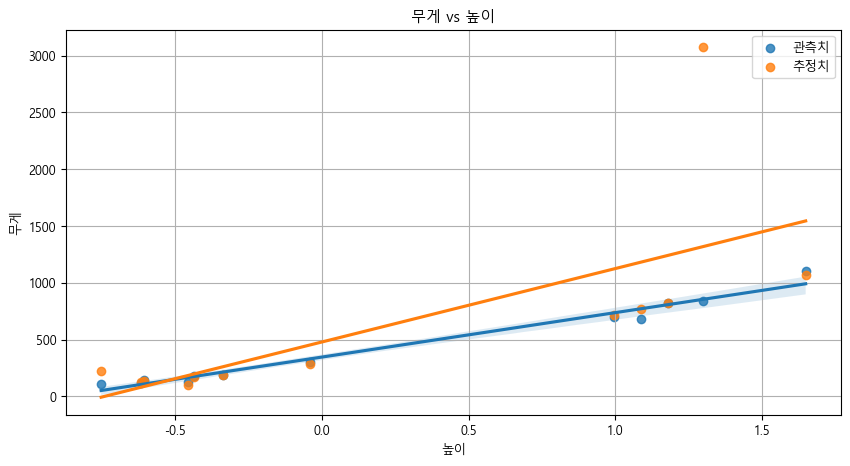

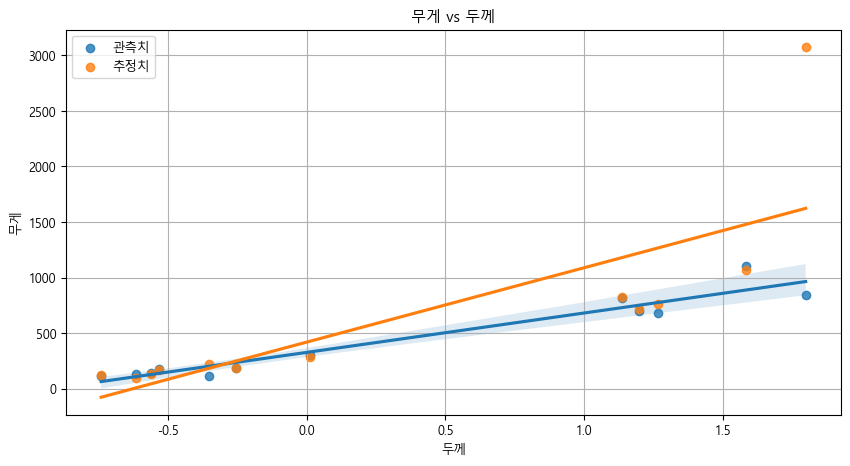

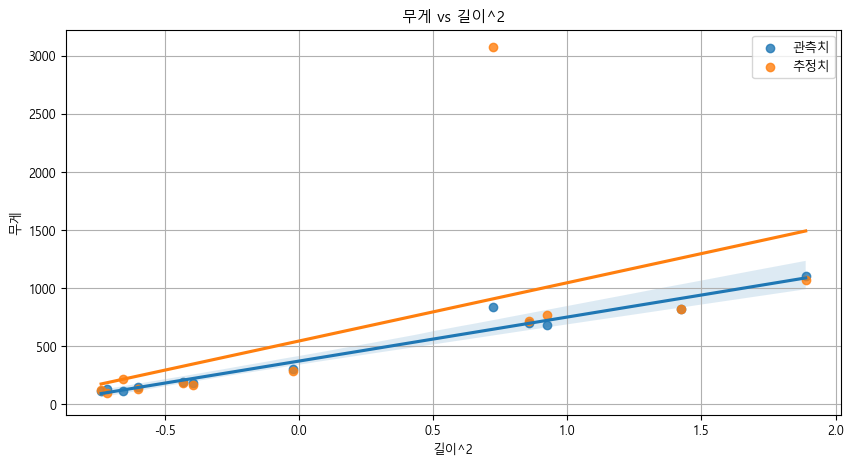

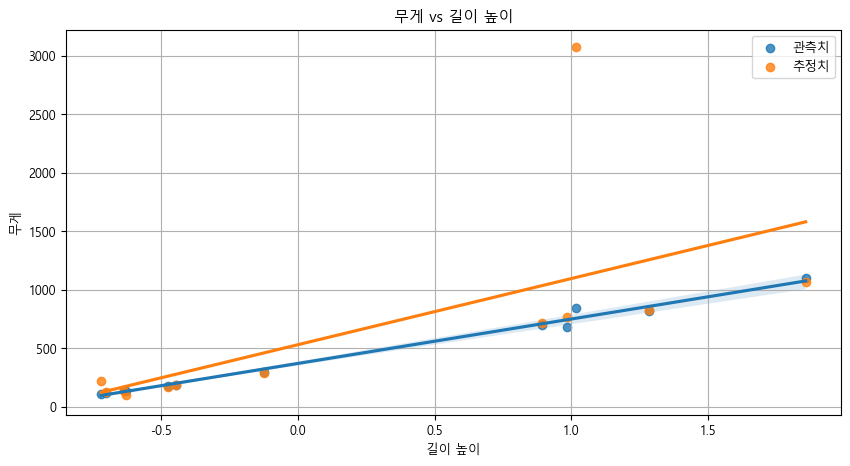

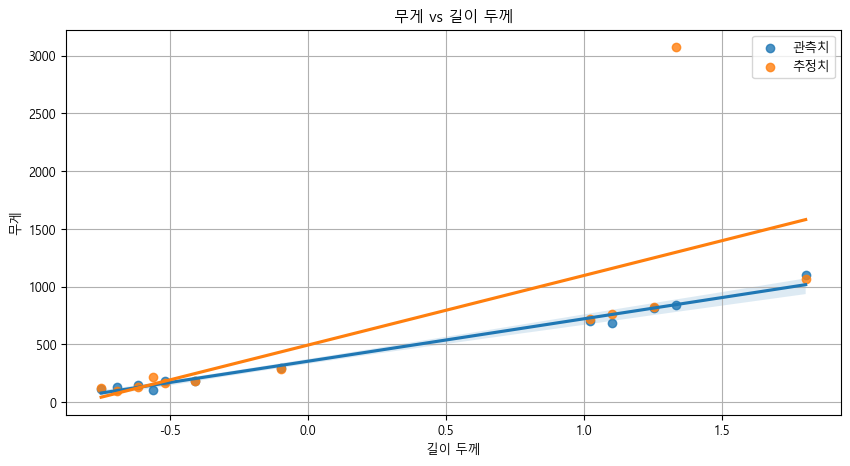

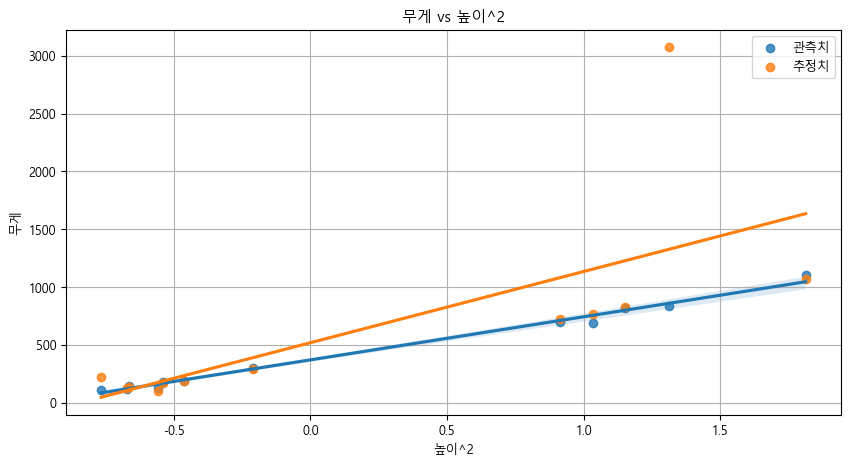

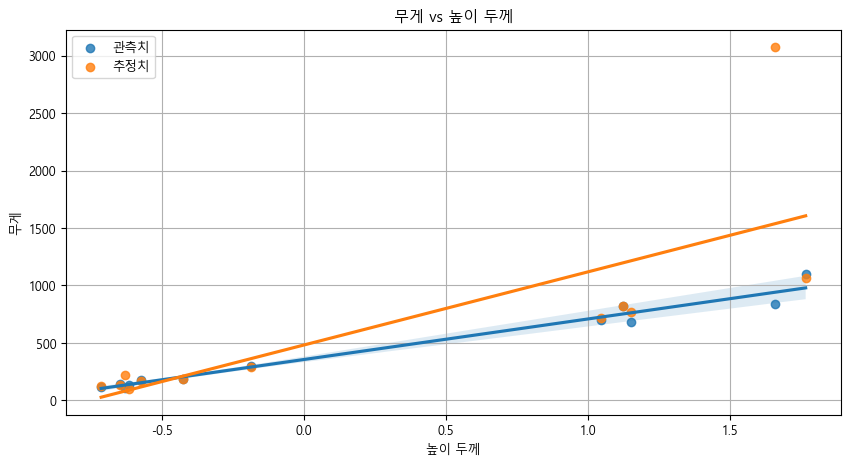

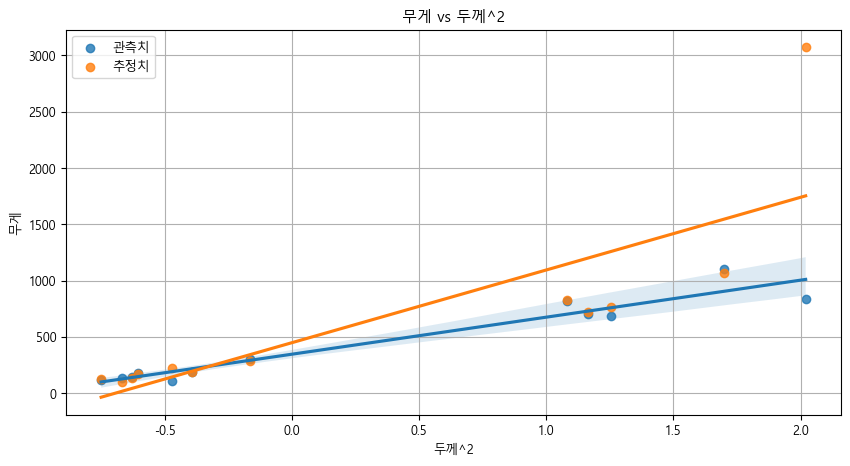

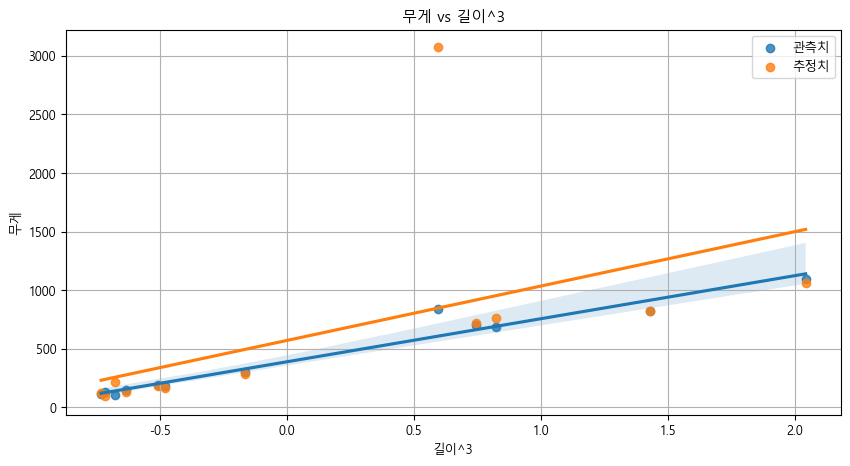

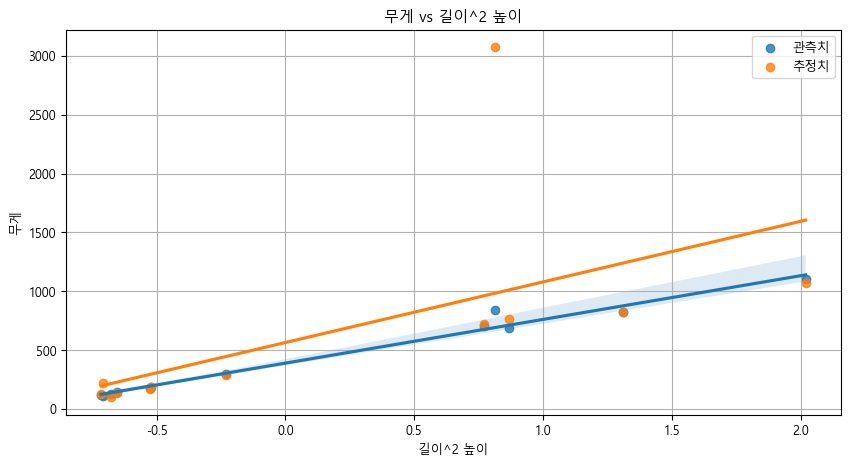

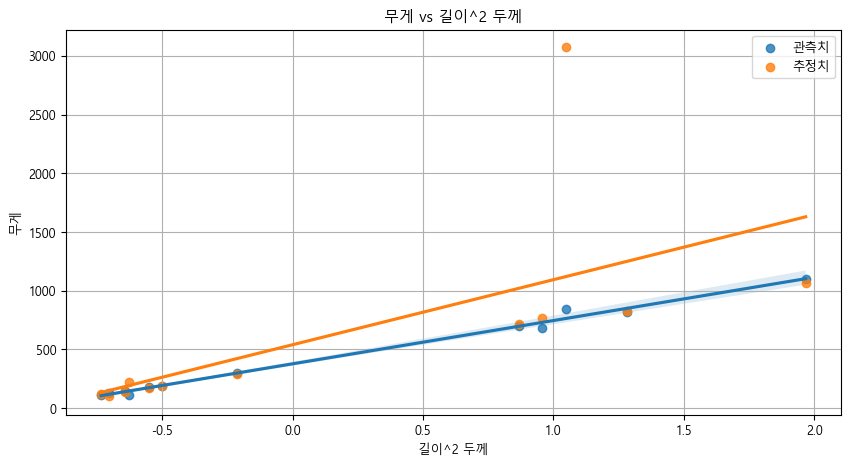

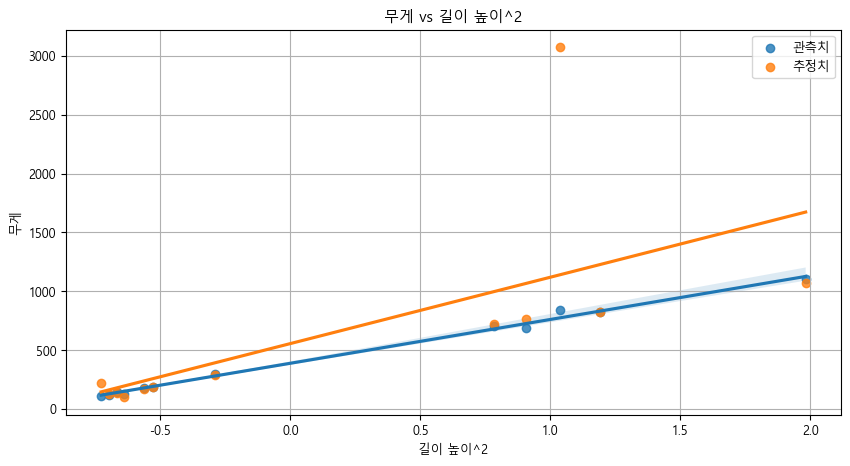

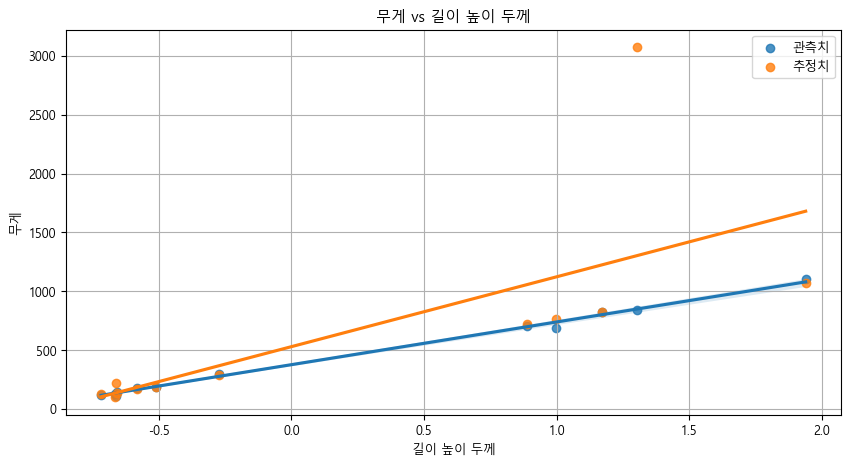

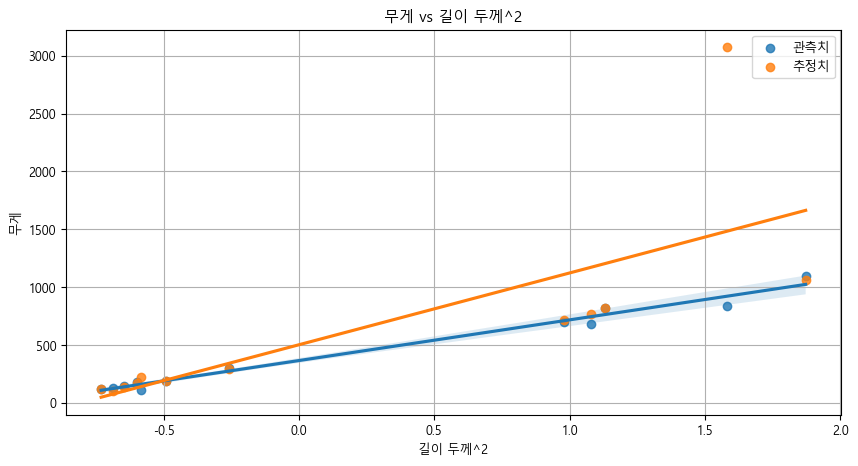

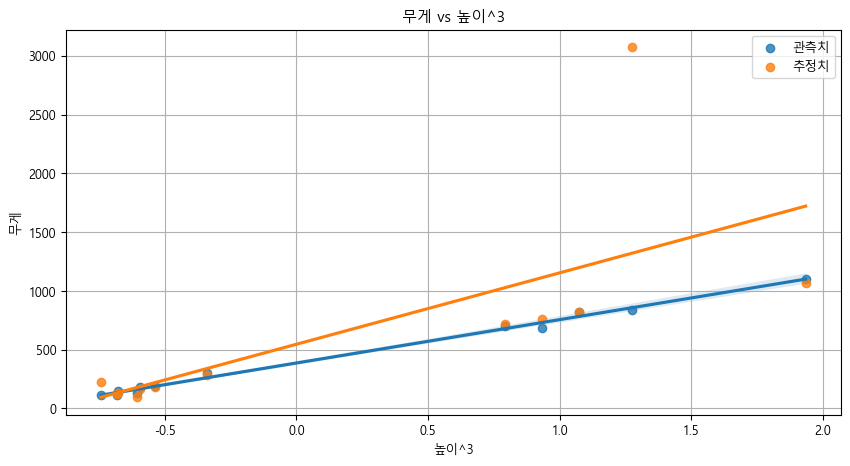

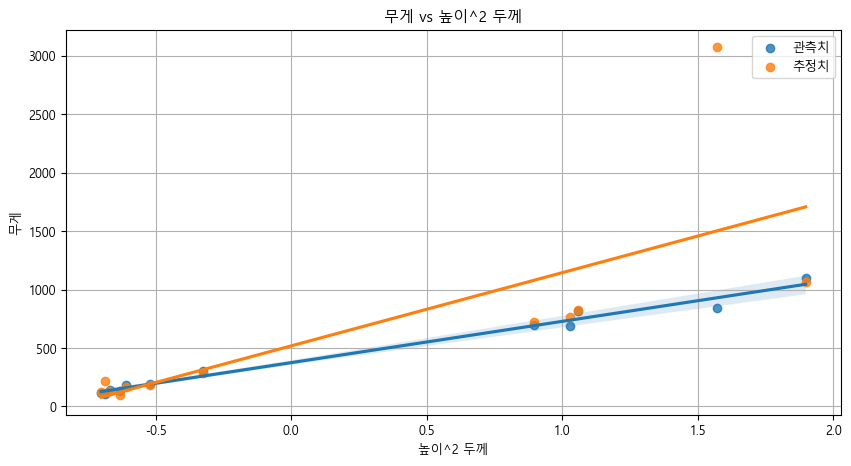

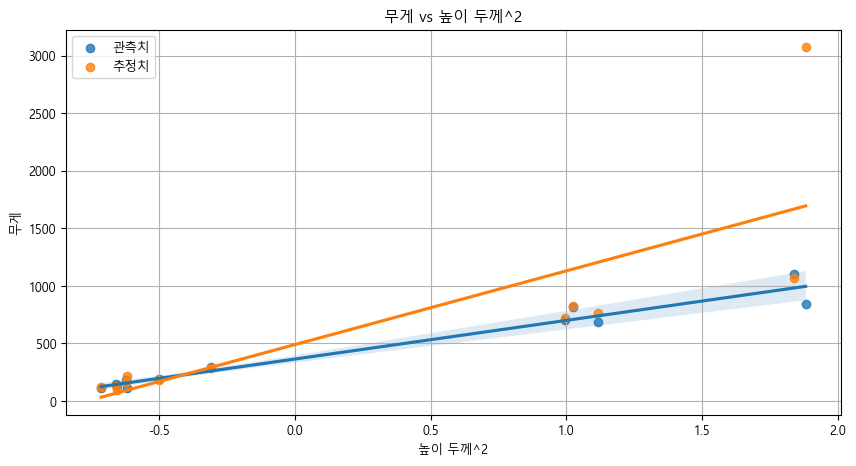

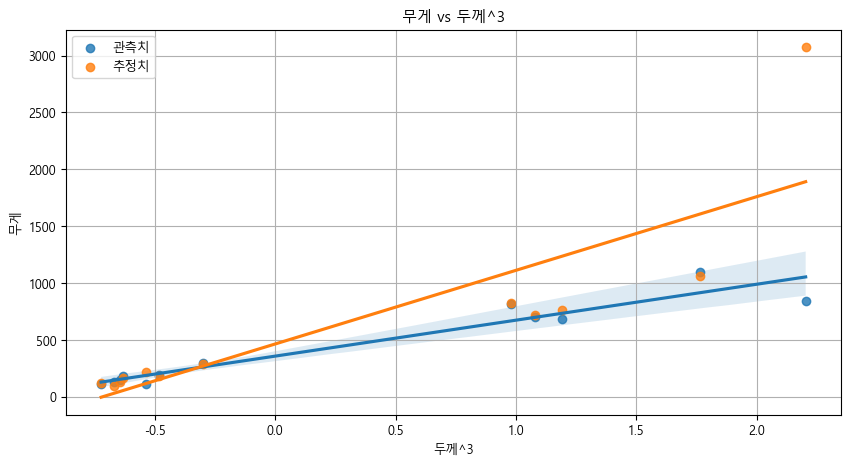

In [11]:
x_train, x_test, y_train, y_test = my_train_test_split(poly_df, yname='무게', test_size=0.2, scalling=True)
fit = my_linear_regression(x_train, y_train, x_test, y_test, cv=5, learning_curve=True, dpi=100)

> 결정계수가 음수가 나왔다. 무슨 뜻일까?
> 
> 특성의 수를 늘리면 선형모델은 훈련 모델에 대해 거의 완벽하게 학습할 정도로 강력해 지지만 훈련 데이터에 과대적합되므로 검증 데이터에 대해서는 형편없는 점수를 만든다.
> 
> 이러한 상황은 다시 특성의 수를 줄여서 과대적합을 해결해야 한다.
>
> 하지만 이러한 상황에서 과대적합을 줄이는 또다른 방법은 모형에 규제를 적용하는 것이다.
>
> 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부른다.